# Task 1
import dataset (with pandas)

In [1]:
import pandas as pd

In [2]:
# import the dataset
base='mammographic_masses_data.csv'
mydata = pd.read_csv(base)
# make dataset in pandas DataFrame
df = pd.DataFrame(data=mydata)
# display the first 5 row of the dataset
df.head()

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


# Task 2 
dataset with summary statistics and visualizations

## 2.1 initial look
get the summary statistics of every variable.

<https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html>

In [3]:
# get the information of every columns
# it will count the non-null data of each variables
## ->　if the count are not the same, meaning some value missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [4]:
# descriptive statistics summary
# include the central tendency, dispersion and shape of a dataset’s distribution
# excluding NaN values
summary = df.describe(include='all')
print(summary)

               BA         Age       Shape      Margin     Density    Severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.300313   55.487448    2.721505    2.796276    2.910734    0.463059
std      0.683469   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max      6.000000   96.000000    4.000000    5.000000    4.000000    1.000000


In [5]:
print(summary['Age'])

count    956.000000
mean      55.487448
std       14.480131
min       18.000000
25%       45.000000
50%       57.000000
75%       66.000000
max       96.000000
Name: Age, dtype: float64


## 2.2 loc function

In [6]:
# all the data where the severity is 1.
df.loc[mydata['Severity']==1]

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
4,5.0,74.0,1.0,5.0,NaN,1
8,5.0,57.0,1.0,5.0,3.0,1
...,...,...,...,...,...,...
951,5.0,67.0,4.0,5.0,3.0,1
952,4.0,68.0,4.0,4.0,3.0,1
955,4.0,52.0,4.0,4.0,3.0,1
957,4.0,56.0,4.0,5.0,3.0,1


In [7]:
# the margin attribute of every instance of the data where the severity is 1.
df.loc[mydata['Severity']==1, 'Margin']

0      5.0
1      1.0
2      5.0
4      5.0
8      5.0
      ... 
951    5.0
952    4.0
955    4.0
957    5.0
959    5.0
Name: Margin, Length: 445, dtype: float64

## 2.3 three visualization

In [8]:
import plotly
import matplotlib.pyplot as plt

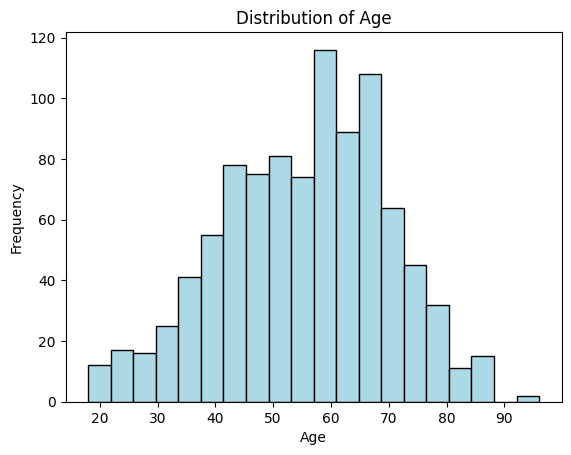

In [9]:
# first visualization, distribution plots, frequency and the variable
# show the frequency of the certain variable
plt.hist(df['Age'], bins=20,  color='lightblue',  edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

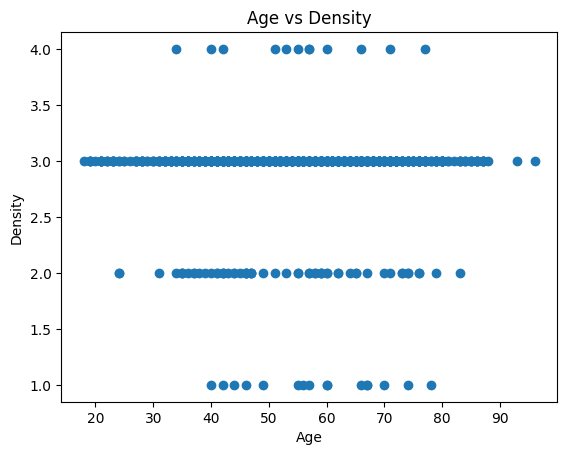

In [10]:
# second visualization, scatterplots
# show the relationship between two varibles
## it could also show the frequency of the certain variables
x = df['Age']
y = df['Density']
plot  = plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age vs Density')
plt.show()

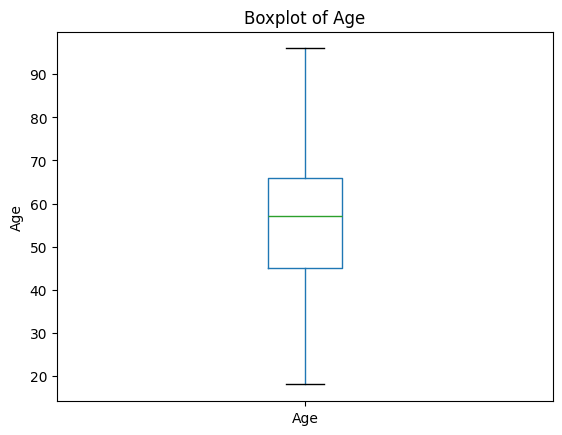

In [11]:
# third visualization, boxplot
# show the statistics value of the (selected) variable age
# df.boxplot(grid=False)
df.boxplot(column=['Age'], grid=False)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

# Task 3
preprocessing with data transformation

## 3.1 data cleaning
**clean the dataset from missing value**
Reason: from task2, we observe there are some missing value. To reducess data inaccuracy, aviod inconsistent predictions, and enhances data interpretability, we need to clean those data.  
Method: since there are many data point in this dataset, we delete the row (point) as long as there is missing value (NaN) present.  

In [12]:
# drop the row (axis=0) if any NA values are present
# the cleaned dataset called cleaned_df
cleaned_df = df.dropna(axis=0, how='any')
# present the differnt of cleaned dataset
cleaned_df.describe()
## observation1: all the variables have the same count
## observation2: summary statistics is difference from task2

,BA,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.338554,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.660689,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


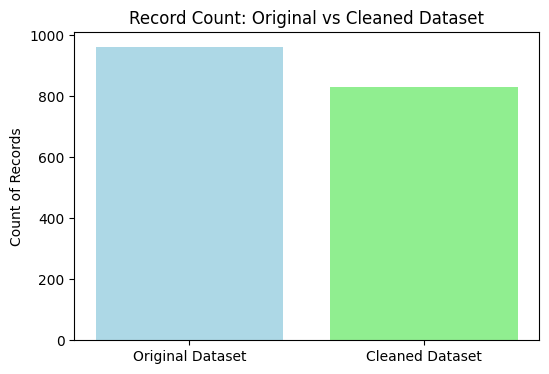

In [13]:
## visualize the change in count
# Bar plot of counts to compare original and cleaned dataset sizes
df_count = len(df)
cleaned_df_count = len(cleaned_df)

# Bar plot showing count comparison
plt.figure(figsize=(6, 4))
plt.bar(['Original Dataset', 'Cleaned Dataset'], 
        [df_count, cleaned_df_count], 
        color=['lightblue', 'lightgreen'])
plt.ylabel('Count of Records')
plt.title('Record Count: Original vs Cleaned Dataset')
plt.show()

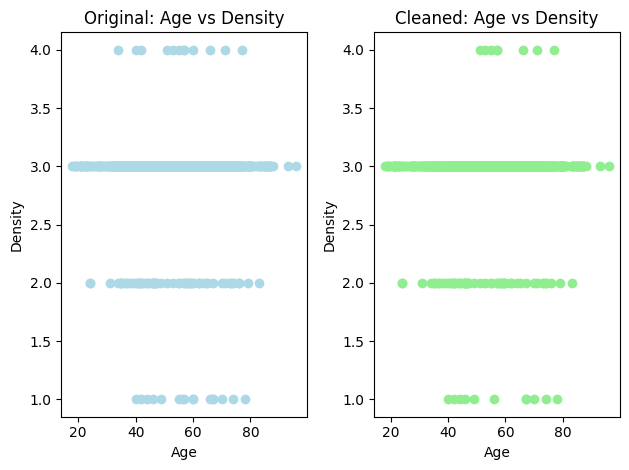

In [14]:
## visualize the removed point, change in count 
# the orginial dataset, on the left
plt.subplot(1,2,1)  
plt.scatter(df['Age'], df['Density'], 
            color='lightblue',label='Original')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Original: Age vs Density')

# the cleaned dataset, on the right
plt.subplot(1, 2, 2)
plt.scatter(cleaned_df['Age'], cleaned_df['Density'], 
            color='lightgreen', label='Cleaned')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Cleaned: Age vs Density')

plt.tight_layout()
plt.show()

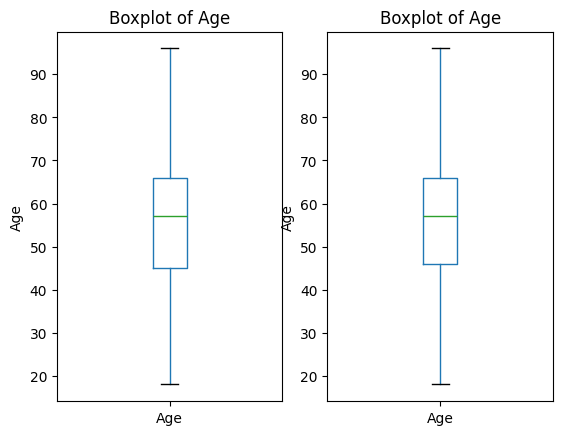

In [15]:
## visualize the change in summary statistics
# the age from orginial dataset, on the left
plt.subplot(1,2,1) 
df.boxplot(column=['Age'], grid=False)
plt.title('Boxplot of Age')
plt.ylabel('Age')

# the age from cleaned dataset, on the right
plt.subplot(1,2,2) 
cleaned_df.boxplot(column=['Age'], grid=False)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

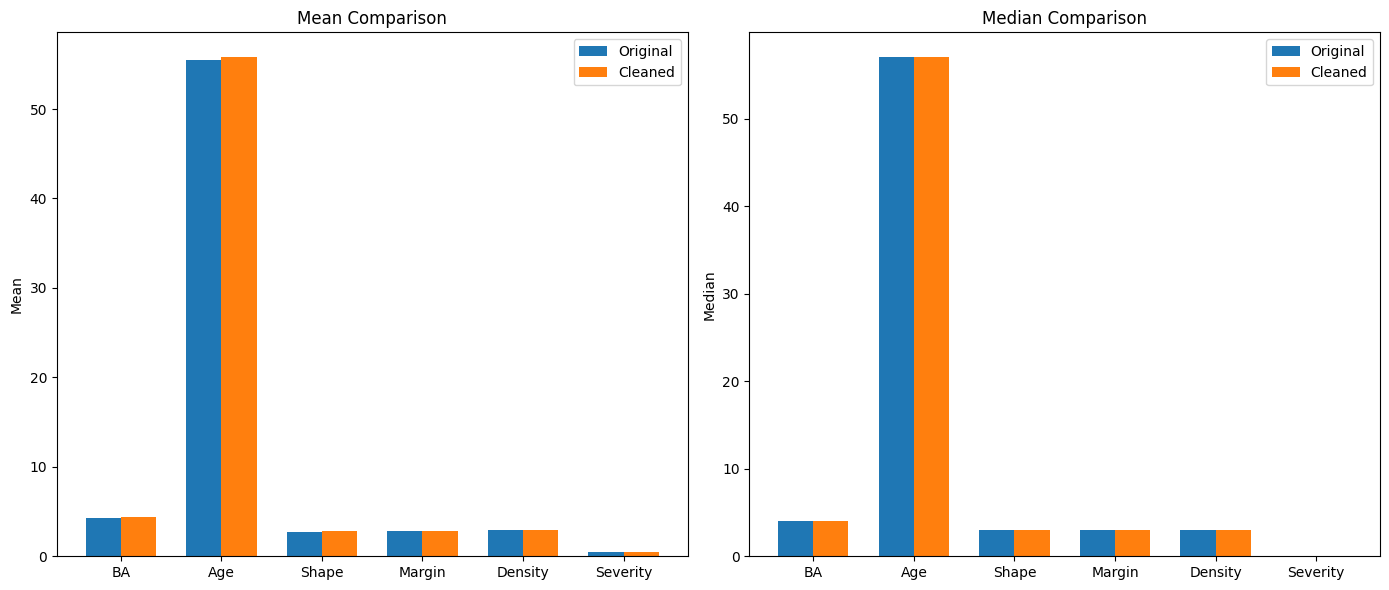

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate summary statistics for both datasets
summary_original = df.describe()
summary_cleaned = cleaned_df.describe()

# Variables to compare
variables = ['BA', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

# Extract mean and median for original and cleaned datasets
mean_original = summary_original.loc['mean', variables]
mean_cleaned = summary_cleaned.loc['mean', variables]

median_original = summary_original.loc['50%', variables]
median_cleaned = summary_cleaned.loc['50%', variables]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for mean comparison
x = np.arange(len(variables))
width = 0.35

axs[0].bar(x - width/2, mean_original, width, label='Original')
axs[0].bar(x + width/2, mean_cleaned, width, label='Cleaned')
axs[0].set_title('Mean Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(variables)
axs[0].set_ylabel('Mean')
axs[0].legend()

# Bar plot for median comparison
axs[1].bar(x - width/2, median_original, width, label='Original')
axs[1].bar(x + width/2, median_cleaned, width, label='Cleaned')
axs[1].set_title('Median Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(variables)
axs[1].set_ylabel('Median')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## 3.2 Normalization

# Task 4